In [68]:
from prophet import Prophet
import pandas as pd

In [69]:
df = pd.read_csv("/Users/srigurubalaji/Desktop/TSA_OG/Act_data.csv",parse_dates=['Date_of_Visit'])

In [70]:
df

,siteid,Date_of_Visit,patientcount,pay_count,free_count,camp_count
0,1,01-01-2014,686,450,236,0
1,1,02-01-2014,1897,1452,445,0
2,1,03-01-2014,2070,1510,560,0
3,1,04-01-2014,2100,1749,351,0
4,1,05-01-2014,313,53,260,0
...,...,...,...,...,...,...
3282,1,27-12-2022,3941,2973,838,130
3283,1,28-12-2022,3884,2904,873,107
3284,1,29-12-2022,4053,2885,870,298
3285,1,30-12-2022,3396,2638,722,36


In [71]:
df.drop(['pay_count','free_count','camp_count','siteid'],axis=1,inplace=True)

In [72]:
df

,Date_of_Visit,patientcount
0,01-01-2014,686
1,02-01-2014,1897
2,03-01-2014,2070
3,04-01-2014,2100
4,05-01-2014,313
...,...,...
3282,27-12-2022,3941
3283,28-12-2022,3884
3284,29-12-2022,4053
3285,30-12-2022,3396


In [73]:
df.columns = ['ds','y']
df

,ds,y
0,01-01-2014,686
1,02-01-2014,1897
2,03-01-2014,2070
3,04-01-2014,2100
4,05-01-2014,313
...,...,...
3282,27-12-2022,3941
3283,28-12-2022,3884
3284,29-12-2022,4053
3285,30-12-2022,3396


In [74]:
df['ds'] = pd.to_datetime(df['ds'],  errors='coerce',format='%d-%m-%Y')

In [75]:
df

,ds,y
0,2014-01-01,686
1,2014-01-02,1897
2,2014-01-03,2070
3,2014-01-04,2100
4,2014-01-05,313
...,...,...
3282,2022-12-27,3941
3283,2022-12-28,3884
3284,2022-12-29,4053
3285,2022-12-30,3396


In [76]:
model=Prophet()

In [77]:
model.fit(df)

22:15:21 - cmdstanpy - INFO - Chain [1] start processing
22:15:21 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
future_dates=model.make_future_dataframe(periods=500)

In [79]:
prediction=model.predict(future_dates)

In [80]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,2074.944570,1577.819315,3016.785475,2074.944570,2074.944570,218.789486,218.789486,218.789486,324.896179,324.896179,324.896179,-106.106693,-106.106693,-106.106693,0.0,0.0,0.0,2293.734056
1,2014-01-02,2075.244609,1574.306003,2953.677144,2075.244609,2075.244609,167.323475,167.323475,167.323475,312.649478,312.649478,312.649478,-145.326004,-145.326004,-145.326004,0.0,0.0,0.0,2242.568083
2,2014-01-03,2075.544648,1204.358801,2671.611199,2075.544648,2075.544648,-146.302909,-146.302909,-146.302909,37.892621,37.892621,37.892621,-184.195530,-184.195530,-184.195530,0.0,0.0,0.0,1929.241739
3,2014-01-04,2075.844686,1343.857533,2742.137647,2075.844686,2075.844686,-5.100569,-5.100569,-5.100569,216.798837,216.798837,216.798837,-221.899405,-221.899405,-221.899405,0.0,0.0,0.0,2070.744117
4,2014-01-05,2076.144725,-742.516859,679.197698,2076.144725,2076.144725,-2138.481744,-2138.481744,-2138.481744,-1880.837663,-1880.837663,-1880.837663,-257.644081,-257.644081,-257.644081,0.0,0.0,0.0,-62.337019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,2024-05-10,4131.437357,3394.953266,5018.917087,3790.502302,4518.647793,58.205868,58.205868,58.205868,37.892621,37.892621,37.892621,20.313246,20.313246,20.313246,0.0,0.0,0.0,4189.643225
3783,2024-05-11,4133.463430,3571.815267,5190.952094,3790.726796,4521.884031,236.960021,236.960021,236.960021,216.798837,216.798837,216.798837,20.161184,20.161184,20.161184,0.0,0.0,0.0,4370.423451
3784,2024-05-12,4135.489504,1522.795184,3136.585644,3791.301818,4525.120269,-1860.500485,-1860.500485,-1860.500485,-1880.837663,-1880.837663,-1880.837663,20.337178,20.337178,20.337178,0.0,0.0,0.0,2274.989019
3785,2024-05-13,4137.515577,3939.436492,5562.378425,3791.876840,4528.356507,609.544008,609.544008,609.544008,588.668624,588.668624,588.668624,20.875385,20.875385,20.875385,0.0,0.0,0.0,4747.059585


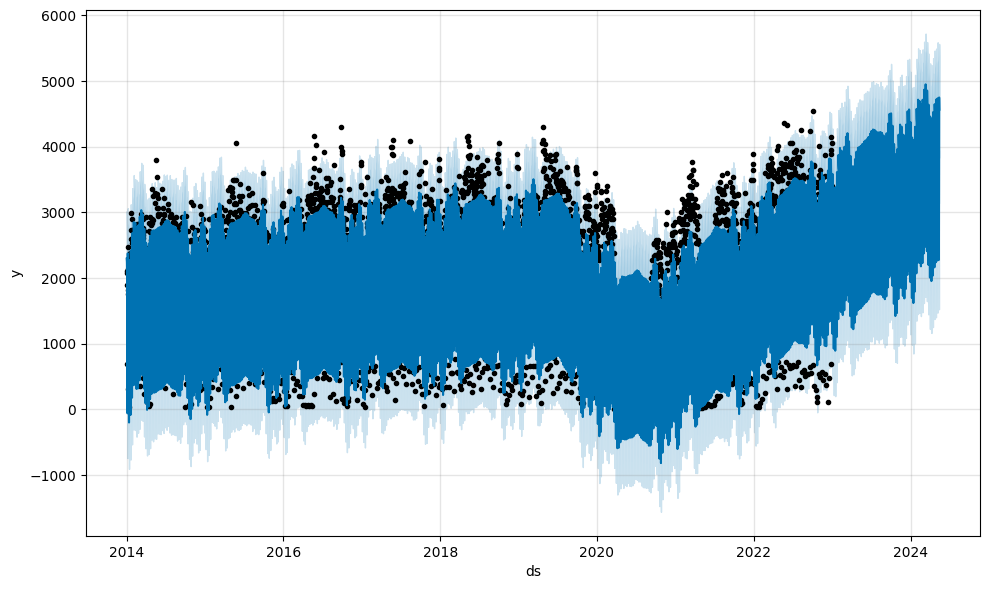

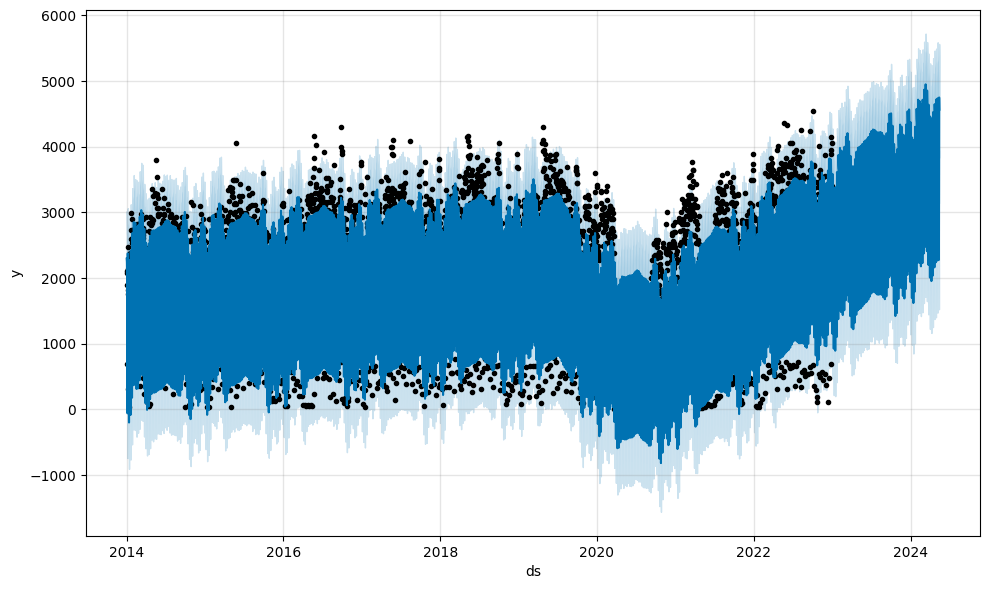

In [90]:
model.plot(prediction)

In [91]:
import matplotlib.pyplot as plt